In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [484]:
sns.set_style('darkgrid')

In [485]:
df = pd.read_csv('Dados Históricos - 2005_2023.csv', parse_dates=[0], index_col='Data')

C:\Users\nycol\AppData\Local\Temp\ipykernel_8848\1798907219.py:1: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [486]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2023-08-25,115.837,117.025,117.252,115.397,"9,21M","-1,02%"
2023-08-24,117.026,118.135,118.136,116.848,"9,20M","-0,94%"
2023-08-23,118.135,116.160,118.135,116.159,"11,54M","1,70%"
2023-08-22,116.156,114.433,116.286,114.433,"9,83M","1,51%"
2023-08-21,114.429,115.404,115.425,114.067,"9,79M","-0,85%"


In [487]:
df.columns=['Fechamento','Abertura','Max','Min','Volume','Var_percent']

In [488]:
df.shape

(4618, 6)

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4618 entries, 2023-08-25 to 2005-01-03
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fechamento   4618 non-null   float64
 1   Abertura     4618 non-null   float64
 2   Max          4618 non-null   float64
 3   Min          4618 non-null   float64
 4   Volume       4617 non-null   object 
 5   Var_percent  4618 non-null   object 
dtypes: float64(4), object(2)
memory usage: 252.5+ KB


In [490]:
df[df['Volume'].isnull()]

,Fechamento,Abertura,Max,Min,Volume,Var_percent
Data,,,,,,
2016-02-10,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [491]:
df['Volume']=df['Volume'].fillna(0)

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4618 entries, 2023-08-25 to 2005-01-03
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fechamento   4618 non-null   float64
 1   Abertura     4618 non-null   float64
 2   Max          4618 non-null   float64
 3   Min          4618 non-null   float64
 4   Volume       4618 non-null   object 
 5   Var_percent  4618 non-null   object 
dtypes: float64(4), object(2)
memory usage: 252.5+ KB


In [493]:
# Transformando colunas Vol e Var em float
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace('M', '').replace(',', '.'))*1_000_000 if (isinstance(x,str)) and ('M' in x) else x)
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace('K', '').replace(',', '.'))*1_000 if (isinstance(x,str)) and ('K' in x) else x)
df['Var_percent'] = df['Var_percent'].apply(lambda x: float(x.replace('%', '').replace(',', '.')))

In [494]:
df

,Fechamento,Abertura,Max,Min,Volume,Var_percent
Data,,,,,,
2023-08-25,115.837,117.025,117.252,115.397,9210000.0,-1.02
2023-08-24,117.026,118.135,118.136,116.848,9200000.0,-0.94
2023-08-23,118.135,116.160,118.135,116.159,11540000.0,1.70
2023-08-22,116.156,114.433,116.286,114.433,9830000.0,1.51
2023-08-21,114.429,115.404,115.425,114.067,9790000.0,-0.85
...,...,...,...,...,...,...
2005-01-07,24.747,24.376,24.874,24.376,104960000.0,1.56
2005-01-06,24.367,24.695,24.808,24.250,151170000.0,-1.32
2005-01-05,24.692,24.859,25.001,24.523,127420000.0,-0.63


In [495]:
df[df['Volume']<1000_000]

,Fechamento,Abertura,Max,Min,Volume,Var_percent
Data,,,,,,
2019-07-01,101.340,100.973,102.432,100.973,424320.0,0.37
2017-07-04,63.232,63.268,63.346,63.076,980070.0,-0.08
2017-01-02,59.589,60.227,60.227,59.371,833730.0,-1.06
2016-12-26,58.620,57.941,58.781,57.941,701230.0,1.18
2016-02-10,40.377,40.592,40.592,39.960,0.0,-0.53
...,...,...,...,...,...,...
2008-04-08,64.540,64.180,64.833,63.453,877990.0,0.57
2008-04-07,64.176,64.447,65.409,63.919,909330.0,-0.42
2008-04-04,64.446,64.177,64.630,63.906,812760.0,0.42


In [496]:
df[df['Volume']>=1000_000]

,Fechamento,Abertura,Max,Min,Volume,Var_percent
Data,,,,,,
2023-08-25,115.837,117.025,117.252,115.397,9210000.0,-1.02
2023-08-24,117.026,118.135,118.136,116.848,9200000.0,-0.94
2023-08-23,118.135,116.160,118.135,116.159,11540000.0,1.70
2023-08-22,116.156,114.433,116.286,114.433,9830000.0,1.51
2023-08-21,114.429,115.404,115.425,114.067,9790000.0,-0.85
...,...,...,...,...,...,...
2005-01-07,24.747,24.376,24.874,24.376,104960000.0,1.56
2005-01-06,24.367,24.695,24.808,24.250,151170000.0,-1.32
2005-01-05,24.692,24.859,25.001,24.523,127420000.0,-0.63


In [497]:
df=df.sort_values(by='Data')

In [498]:
df

,Fechamento,Abertura,Max,Min,Volume,Var_percent
Data,,,,,,
2005-01-03,25.722,26.193,26.492,25.671,115640000.0,-1.81
2005-01-04,24.848,25.722,25.873,24.791,146140000.0,-3.40
2005-01-05,24.692,24.859,25.001,24.523,127420000.0,-0.63
2005-01-06,24.367,24.695,24.808,24.250,151170000.0,-1.32
2005-01-07,24.747,24.376,24.874,24.376,104960000.0,1.56
...,...,...,...,...,...,...
2023-08-21,114.429,115.404,115.425,114.067,9790000.0,-0.85
2023-08-22,116.156,114.433,116.286,114.433,9830000.0,1.51
2023-08-23,118.135,116.160,118.135,116.159,11540000.0,1.70


In [499]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

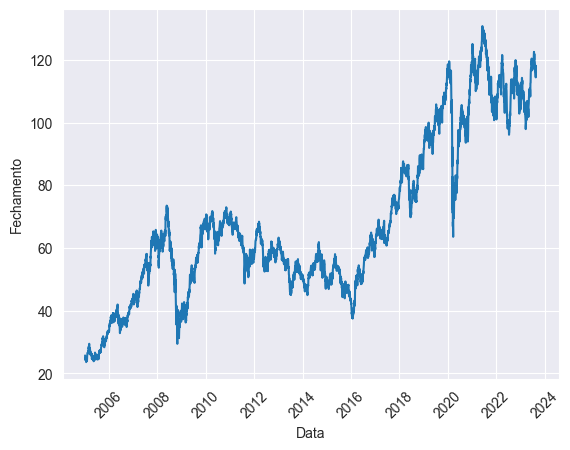

In [500]:
plt.plot(df.index,df.Fechamento)
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.show()

In [501]:
dff=df[['Fechamento']]
dff.head()

,Fechamento
Data,
2005-01-03,25.722
2005-01-04,24.848
2005-01-05,24.692
2005-01-06,24.367
2005-01-07,24.747


Decomposição da série

In [502]:
resultados=seasonal_decompose(dff, period=20,model='multiplicative')

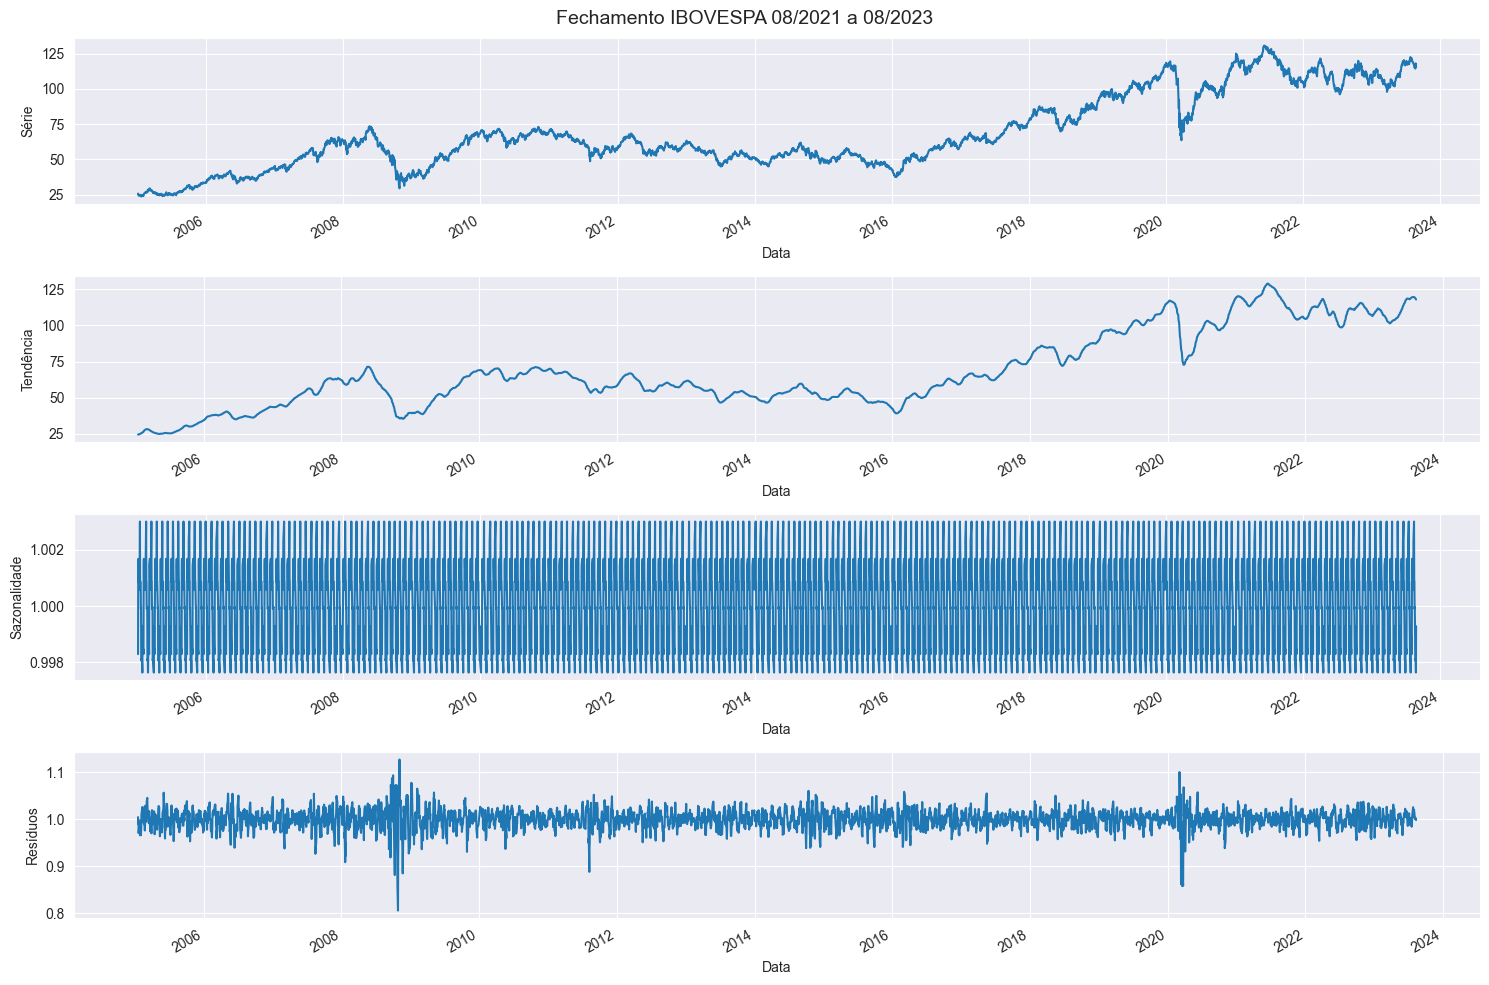

In [503]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
ax1.set_ylabel('Série')

resultados.trend.plot(ax=ax2)
ax2.set_ylabel('Tendência')

resultados.seasonal.plot(ax=ax3)
ax3.set_ylabel('Sazonalidade')

resultados.resid.plot(ax=ax4)
ax4.set_ylabel('Resíduos')

fig.suptitle("Fechamento IBOVESPA 08/2021 a 08/2023", fontsize=14)
plt.tight_layout()

Olhando a média móvel

Text(0, 0.5, 'Fechamento')

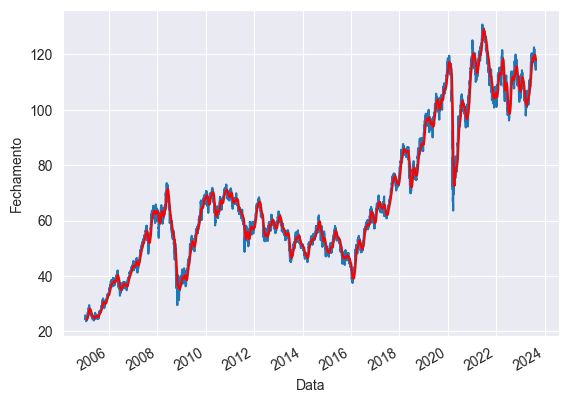

In [504]:
mm=dff.rolling(20).mean()
# std=dff.rolling(5).std()

f,ax=plt.subplots()
dff.plot(ax=ax,legend=False)
mm.plot(ax=ax, color='r',legend=False)
# std.plot(ax=ax,legend=False, color='g')

plt.ylabel('Fechamento')

Dá para ver que a média móvel não é estável. Fazendo o teste se é uma série estacionária

In [505]:
# Teste ADF
def adf(y_values):
    result_adf=adfuller(y_values)

    if result_adf[1]>0.05:
        print("Teste ADF: NÃO ESTACIONÁRIA")
    else:
        print("Teste ADF: ESTACIONÁRIA")
    
    print(f"Teste Estatístico: {result_adf[0]}")
    print(f"P-Value: {result_adf[1]}")
    print("Valores críticos:")

    for key, value in result_adf[4].items():
        print(f"\t{key}: {value}")

In [506]:
adf(dff.Fechamento.values)

Teste ADF: NÃO ESTACIONÁRIA
Teste Estatístico: -1.4822676287583556
P-Value: 0.5422643435105844
Valores críticos:
	1%: -3.4317705271647956
	5%: -2.8621677075820893
	10%: -2.5671041315364107


Tratamento da série para atender estacionariedade

Text(0, 0.5, 'log(Fechamento)')

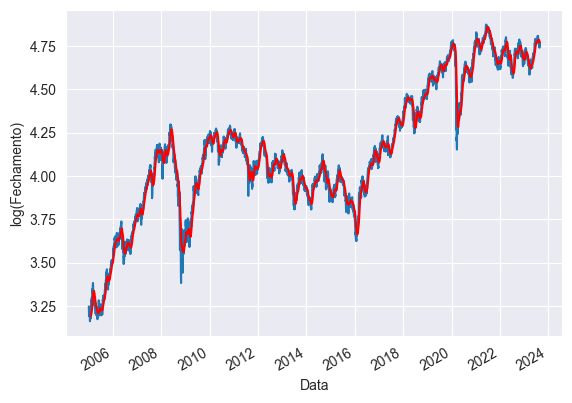

In [507]:
# Aplicando log
dff_log=np.log(dff)
mm_log=dff_log.rolling(20).mean()

f,ax=plt.subplots()
dff_log.plot(ax=ax,legend=False)
mm_log.plot(ax=ax, color='r',legend=False)

plt.ylabel('log(Fechamento)')

In [508]:
# Teste ADF
adf(dff_log.Fechamento.dropna().values)

Teste ADF: NÃO ESTACIONÁRIA
Teste Estatístico: -2.0200964836449997
P-Value: 0.2778315961592973
Valores críticos:
	1%: -3.4317689859382137
	5%: -2.862167026701849
	10%: -2.5671037690729563


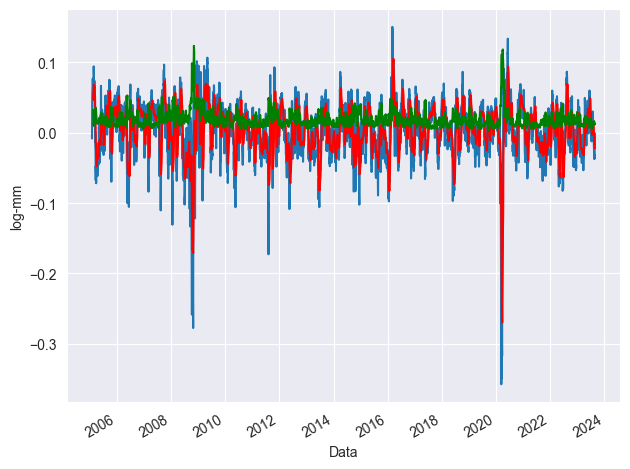

In [509]:
# Subtraindo a média móvel do log
dff_s=(dff_log-mm_log).dropna()
mm_s=dff_s.rolling(12).mean()
std_s=dff_s.rolling(12).std()

f, ax = plt.subplots()
dff_s.plot(ax=ax, legend=False)
mm_s.plot(ax=ax, legend=False, color='r')
std_s.plot(ax=ax, legend=False, color='g')
plt.ylabel('log-mm')

plt.tight_layout()

In [510]:
# Teste ADF
adf(dff_s.Fechamento.dropna().values)

Teste ADF: ESTACIONÁRIA
Teste Estatístico: -11.218696853930407
P-Value: 2.038951540171713e-20
Valores críticos:
	1%: -3.431779220283258
	5%: -2.8621715480053513
	10%: -2.567106175969139


Muito bom. Mas agora diferenciando também

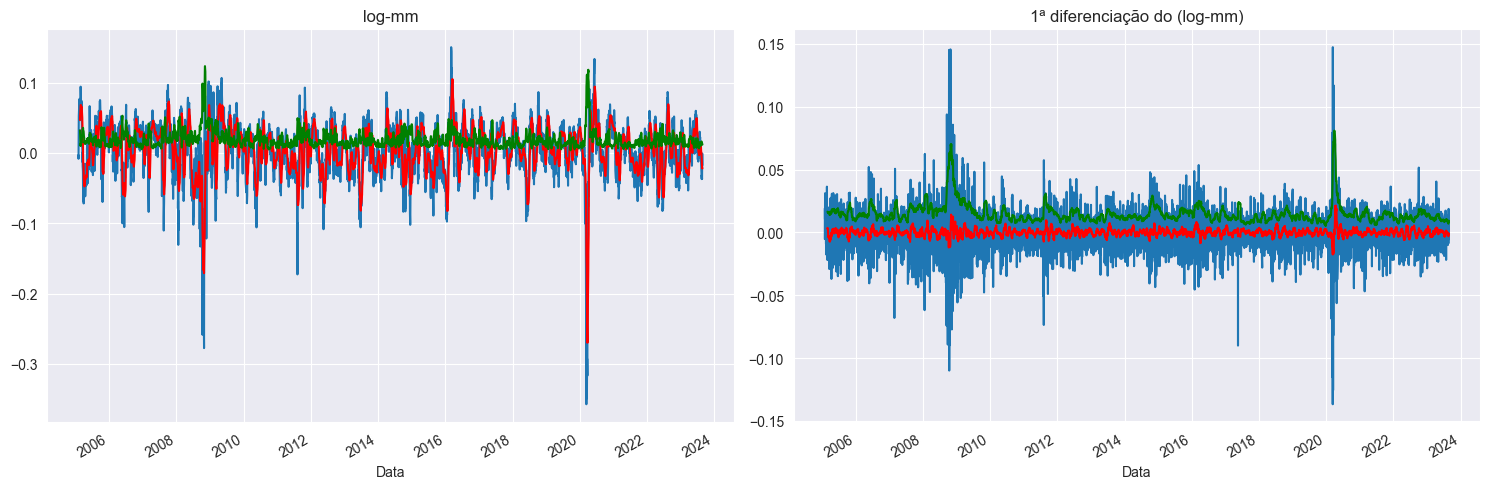

In [511]:
dff_s_diff=dff_s.diff(1)
mm_s_diff=dff_s_diff.rolling(20).mean()
std_s_diff=dff_s_diff.rolling(20).std()

f, ax = plt.subplots(1,2,figsize=(15,5))

dff_s.plot(ax=ax[0], legend=False)
mm_s.plot(ax=ax[0], legend=False, color='r')
std_s.plot(ax=ax[0], legend=False, color='g')
ax[0].set_title('log-mm')

dff_s_diff.plot(ax=ax[1], legend=False)
mm_s_diff.plot(ax=ax[1], legend=False, color='r')
std_s_diff.plot(ax=ax[1], legend=False, color='g')
ax[1].set_title('1ª diferenciação do (log-mm)')

plt.tight_layout()

In [512]:
adf(dff_s_diff.Fechamento.dropna().values)

Teste ADF: ESTACIONÁRIA
Teste Estatístico: -19.329743872082492
P-Value: 0.0
Valores críticos:
	1%: -3.431780783834263
	5%: -2.862172238745658
	10%: -2.567106543681959


In [513]:
dff_log.shape

(4618, 1)

In [514]:
dff_s.shape

(4599, 1)

In [515]:
dff_s_diff.shape

(4599, 1)

In [516]:
dff_s_diff

,Fechamento
Data,
2005-01-31,NaN
2005-02-01,-0.005257
2005-02-02,0.019198
2005-02-03,0.010506
2005-02-04,0.031187
...,...
2023-08-21,-0.005595
2023-08-22,0.017437
2023-08-23,0.018733


In [517]:
#janela da média móvel
4618-4599

19

Agora, tentando só pelas diferenciações

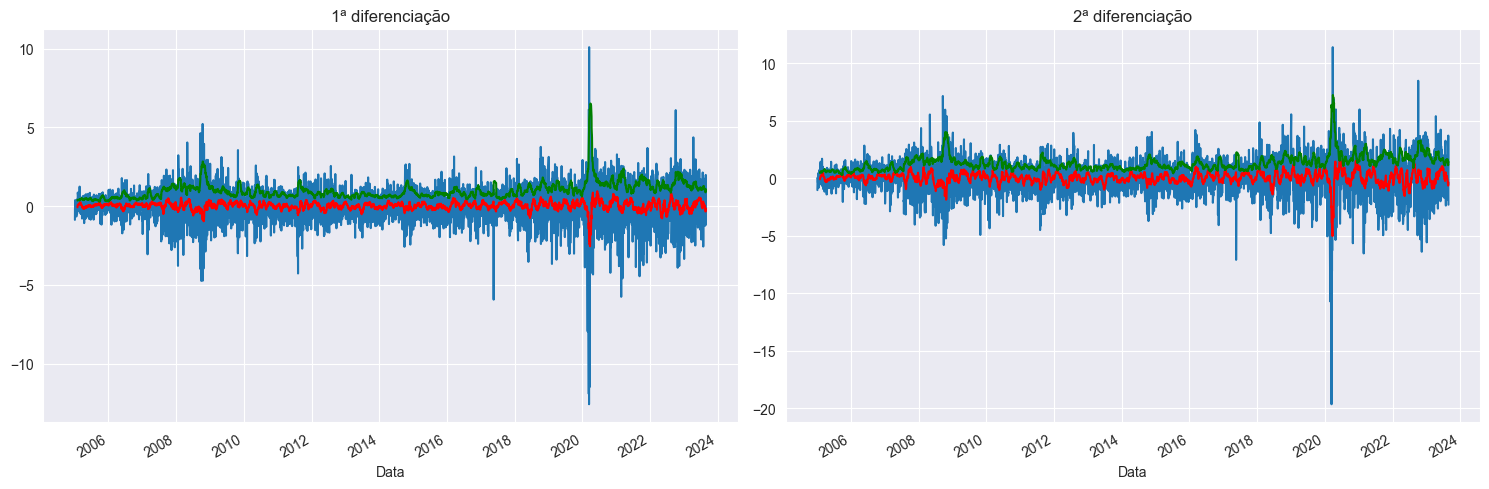

In [518]:
# 1ª e 2ª diferenciação
dff_diff=dff.diff(1)
mm_diff=dff_diff.rolling(20).mean()
std_diff=dff_diff.rolling(20).std()

dff_diff2=dff.diff(2)
mm_diff2=dff_diff2.rolling(20).mean()
std_diff2=dff_diff2.rolling(20).std()

f, ax = plt.subplots(1,2, figsize=(15,5))

dff_diff.plot(ax=ax[0], legend=False)
mm_diff.plot(ax=ax[0], legend=False, color='r')
std_diff.plot(ax=ax[0],legend=False, color='g')
ax[0].set_title('1ª diferenciação')

dff_diff2.plot(ax=ax[1], legend=False)
mm_diff2.plot(ax=ax[1], legend=False, color='r')
std_diff2.plot(ax=ax[1], legend=False, color='g')
ax[1].set_title('2ª diferenciação')

plt.tight_layout()

In [519]:
# Teste ADF - 1ª diferenciação
adf(dff_diff.Fechamento.dropna().values)

Teste ADF: ESTACIONÁRIA
Teste Estatístico: -18.71064080283373
P-Value: 2.0348003673283923e-30
Valores críticos:
	1%: -3.4317705271647956
	5%: -2.8621677075820893
	10%: -2.5671041315364107


In [520]:
# Teste ADF - 2ª diferenciação
adf(dff_diff2.Fechamento.dropna().values)

Teste ADF: ESTACIONÁRIA
Teste Estatístico: -10.981614573419973
P-Value: 7.434102248066434e-20
Valores críticos:
	1%: -3.431777660145799
	5%: -2.8621708587727084
	10%: -2.5671058090589796


### Conclusão: Tratamento escolhido foi log menos média móvel com uma diferenciação

(talvez, tentar dar uma olhada em Box-Cox)

Fazendo gráficos ACF e PACF

In [521]:
lag_acf=acf(dff_s_diff.dropna(),nlags=20)
lag_pacf=pacf(dff_s_diff.dropna(),nlags=20)
# lag_acf=acf(dff.dropna(),nlags=5)
# lag_pacf=pacf(dff.dropna(),nlags=5)


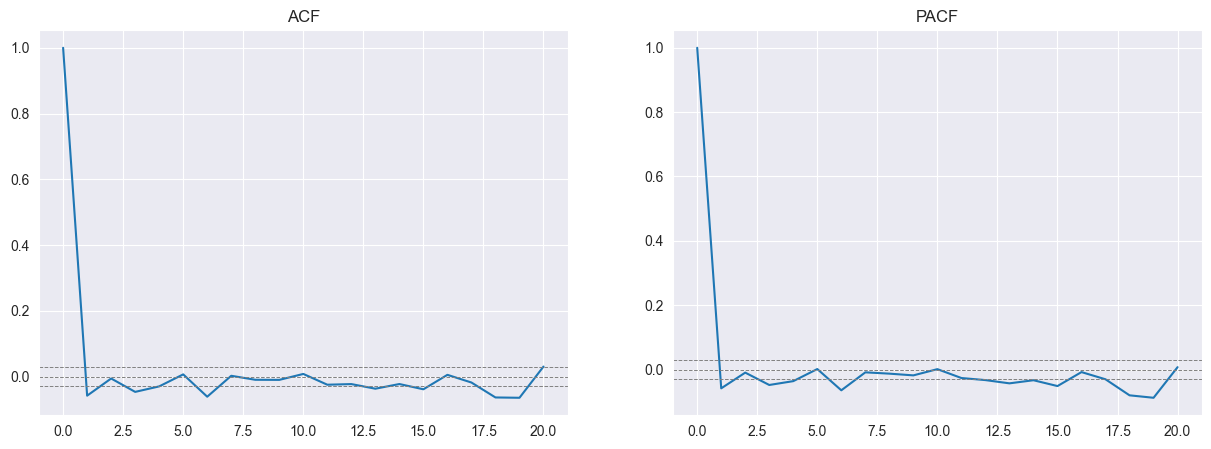

In [522]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(lag_acf)

ax[0].axhline(y= -1.96/(np.sqrt((len(dff_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
ax[0].axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
ax[0].axhline(y= 1.96/(np.sqrt((len(dff_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
ax[0].set_title("ACF")


ax[1].plot(lag_pacf)

ax[1].axhline(y= -1.96/(np.sqrt((len(dff_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
ax[1].axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
ax[1].axhline(y= 1.96/(np.sqrt((len(dff_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
ax[1].set_title("PACF")

plt.show()

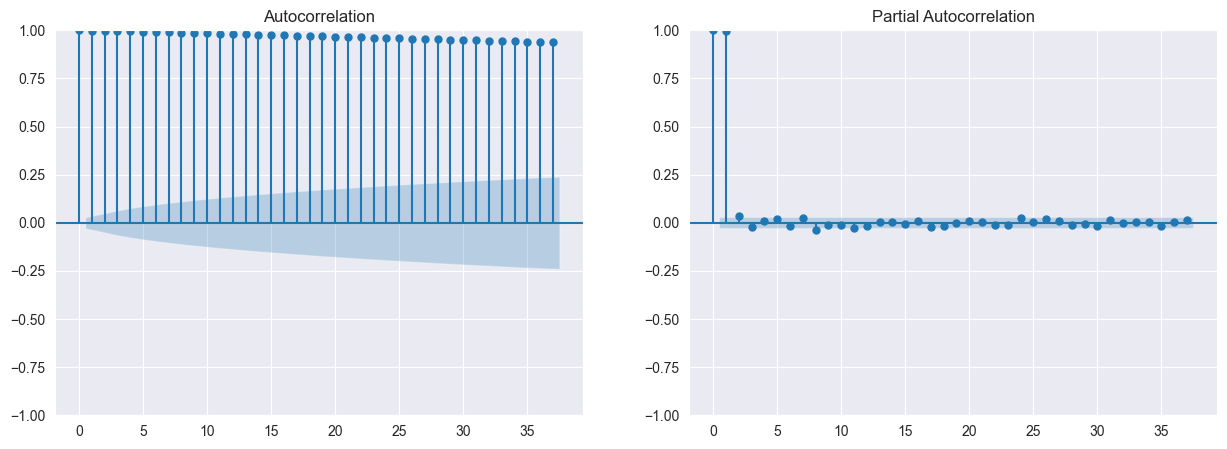

In [523]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(dff.Fechamento,ax=ax[0])
plot_pacf(dff.Fechamento,ax=ax[1])
plt.show()

### Transformando os dataframes para trabalhar com bibliotecas mais específicas

In [524]:
# df1= df com a série original
df1=dff.reset_index()
df1=df1[['Data','Fechamento']]
df1.columns=['ds','y']

In [525]:
df1.head(20)

,ds,y
0,2005-01-03,25.722
1,2005-01-04,24.848
2,2005-01-05,24.692
3,2005-01-06,24.367
4,2005-01-07,24.747
5,2005-01-10,24.292
6,2005-01-11,24.370
7,2005-01-12,24.510
8,2005-01-13,24.806
9,2005-01-14,24.924


In [526]:
# df2= df transformado por loc - mm com 1ª diferenciação
df2=dff_s_diff.reset_index()
df2.columns=['ds','y']
df2

,ds,y
0,2005-01-31,NaN
1,2005-02-01,-0.005257
2,2005-02-02,0.019198
3,2005-02-03,0.010506
4,2005-02-04,0.031187
...,...,...
4594,2023-08-21,-0.005595
4595,2023-08-22,0.017437
4596,2023-08-23,0.018733
4597,2023-08-24,-0.008181


In [527]:
df1['unique_id']='Fechamento'
df2['unique_id']='Fechamento'

In [528]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4618 entries, 0 to 4617
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         4618 non-null   datetime64[ns]
 1   y          4618 non-null   float64       
 2   unique_id  4618 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 108.4+ KB


In [529]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         4599 non-null   datetime64[ns]
 1   y          4598 non-null   float64       
 2   unique_id  4599 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 107.9+ KB


### Statsforecast.models

In [530]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

In [531]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

### Sem transformação

In [532]:
# train = df1.loc[(df1['ds'] < '2023-07-01')]
# train = df1.loc[(df1['ds']>= '2018-07-01') & (df1['ds'] < '2023-07-01')]
# train = df1.loc[(df1['ds']>= '2020-07-01') & (df1['ds'] < '2023-07-01')]
train = df1.loc[(df1['ds']>= '2023-01-01') & (df1['ds'] < '2023-07-01')]
test= df1.loc[(df1['ds']>= '2023-07-01') & (df1['ds'] < '2023-08-16')]

h=test.iloc[-1]['ds']-train.iloc[-1]['ds']
h_test = h.days

In [533]:
train.shape

(124, 3)

In [534]:
test.shape

(32, 3)

In [535]:
h_test

46

#### Naive

In [536]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(train)

forecast_df = model.predict(h=h_test, level=[90])
forecast_df

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



,ds,Naive,Naive-lo-90,Naive-hi-90
unique_id,,,,
Fechamento,2023-07-01,118.086998,116.028389,120.145607
Fechamento,2023-07-02,118.086998,115.175682,120.998314
Fechamento,2023-07-03,118.086998,114.521378,121.652618
Fechamento,2023-07-04,118.086998,113.969780,122.204216
Fechamento,2023-07-05,118.086998,113.483803,122.690193
Fechamento,2023-07-06,118.086998,113.044449,123.129547
Fechamento,2023-07-07,118.086998,112.640427,123.533569
Fechamento,2023-07-08,118.086998,112.264366,123.909630
Fechamento,2023-07-09,118.086998,111.911163,124.262833


In [537]:
test

,ds,y,unique_id
4578,2023-07-03,119.673,Fechamento
4579,2023-07-04,119.076,Fechamento
4580,2023-07-05,119.549,Fechamento
4581,2023-07-06,117.426,Fechamento
4582,2023-07-07,118.898,Fechamento
4583,2023-07-10,117.942,Fechamento
4584,2023-07-11,117.220,Fechamento
4585,2023-07-12,117.666,Fechamento
4586,2023-07-13,119.264,Fechamento
4587,2023-07-14,117.711,Fechamento


In [538]:
forecast_df = forecast_df.reset_index().merge(test, on=['ds','unique_id'], how='left')
forecast_df

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,Fechamento,2023-07-01,118.086998,116.028389,120.145607,NaN
1,Fechamento,2023-07-02,118.086998,115.175682,120.998314,NaN
2,Fechamento,2023-07-03,118.086998,114.521378,121.652618,119.673
3,Fechamento,2023-07-04,118.086998,113.969780,122.204216,119.076
4,Fechamento,2023-07-05,118.086998,113.483803,122.690193,119.549
5,Fechamento,2023-07-06,118.086998,113.044449,123.129547,117.426
6,Fechamento,2023-07-07,118.086998,112.640427,123.533569,118.898
7,Fechamento,2023-07-08,118.086998,112.264366,123.909630,NaN
8,Fechamento,2023-07-09,118.086998,111.911163,124.262833,NaN
9,Fechamento,2023-07-10,118.086998,111.577095,124.596901,117.942


In [539]:
forecast_df.dropna(inplace=True)
forecast_df.shape

(32, 6)

WMAPE: 1.23%


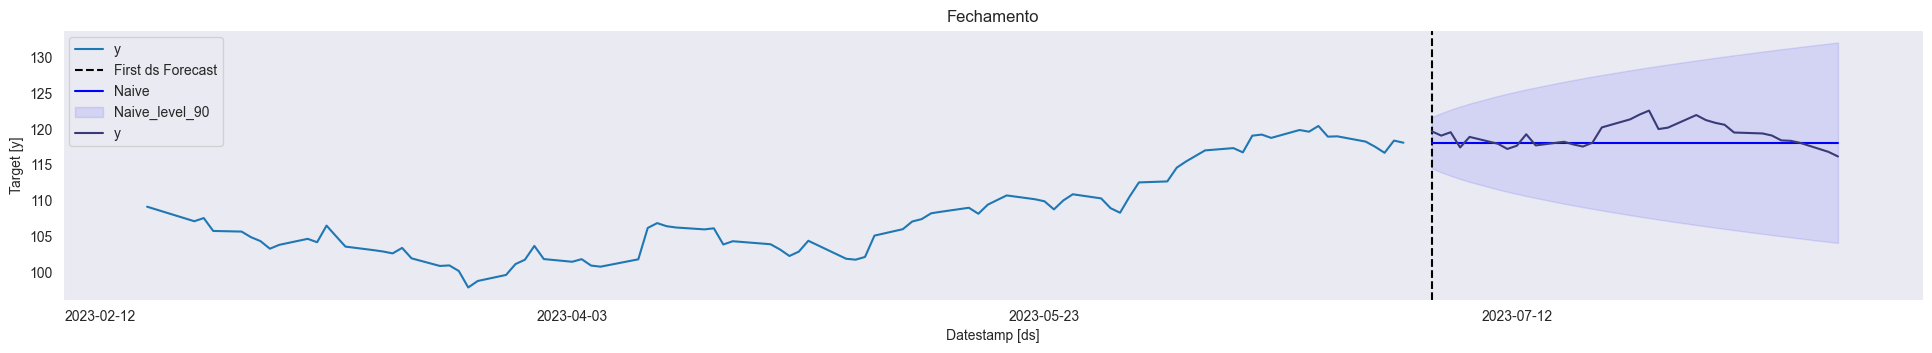

In [540]:
wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(train, forecast_df, level=[90],unique_ids=['Fechamento'],engine ='matplotlib',max_insample_length=90)

#### SeasonalNaive

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 1.96%


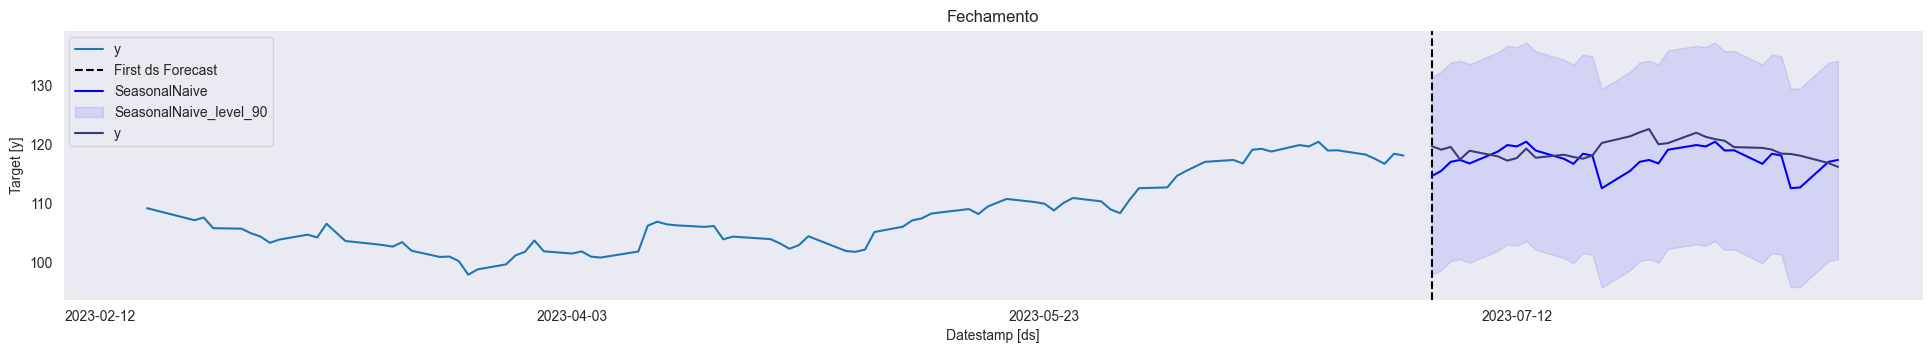

In [541]:
model_seaN = StatsForecast(models=[SeasonalNaive(season_length=20)], freq='D', n_jobs=-1)
model_seaN.fit(train)

forecast_df_seaN = model_seaN.predict(h=h_test, level=[90])
forecast_df_seaN = forecast_df_seaN.reset_index().merge(test, on=['ds','unique_id'], how='left')
forecast_df_seaN.dropna(inplace=True)
# forecast_df_seaN

wmape2 = wmape(forecast_df_seaN['y'].values, forecast_df_seaN['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_seaN.plot(train, forecast_df_seaN, level=[90],unique_ids=['Fechamento'],engine ='matplotlib',max_insample_length=90)

#### SeasonalWindowAverage

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 9.47%


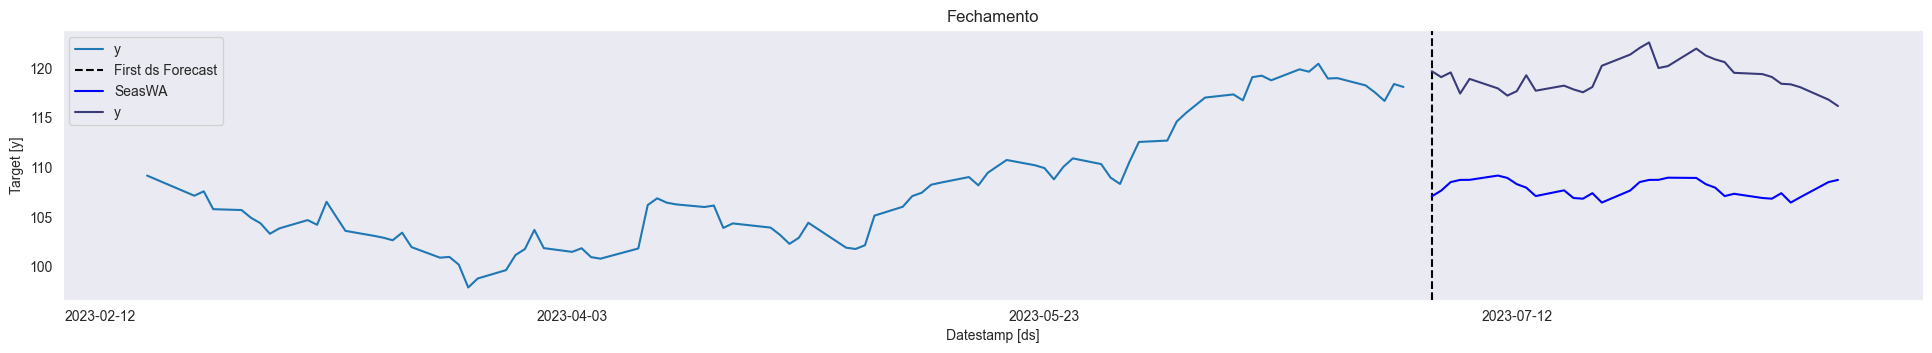

In [542]:
model_seaWA = StatsForecast(models=[SeasonalWindowAverage(season_length=20,window_size=5)], freq='D', n_jobs=-1)
model_seaWA.fit(train)

forecast_df_seaWA = model_seaWA.predict(h=h_test, level=[90])
forecast_df_seaWA = forecast_df_seaWA.reset_index().merge(test, on=['ds','unique_id'], how='left')
forecast_df_seaWA.dropna(inplace=True)
# forecast_df_seaWA

wmape3 = wmape(forecast_df_seaWA['y'].values, forecast_df_seaWA['SeasWA'].values)
print(f"WMAPE: {wmape3:.2%}")

model_seaWA.plot(train, forecast_df_seaWA, level=[90],unique_ids=['Fechamento'],engine ='matplotlib',max_insample_length=90)

#### AutoARIMA

WMAPE: 1.23%


<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



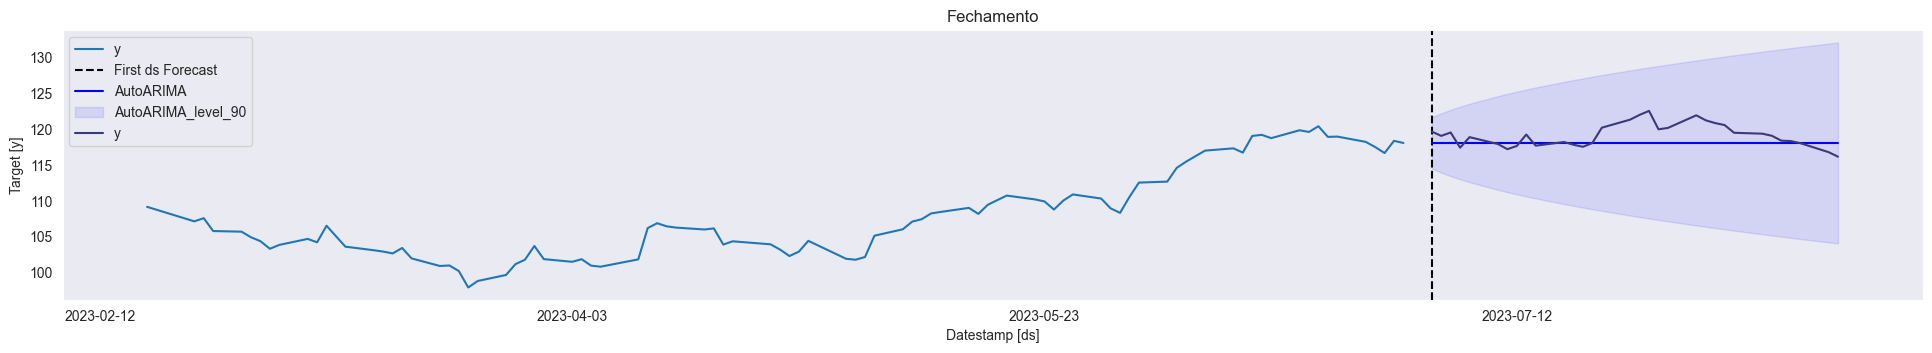

In [543]:
model_a = StatsForecast(models=[AutoARIMA(season_length=20)], freq='D', n_jobs=-1)
model_a.fit(train)

forecast_df_a = model_a.predict(h=h_test, level=[90])
forecast_df_a = forecast_df_a.reset_index().merge(test, on=['ds','unique_id'], how='left')
forecast_df_a.dropna(inplace=True)
# forecast_df_a

wmape4 = wmape(forecast_df_a['y'].values, forecast_df_a['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(train, forecast_df_a, level=[90],unique_ids=['Fechamento'],engine ='matplotlib',max_insample_length=90)

### Agora com a transformação

In [544]:
# train2 = df2.loc[(df2['ds'] < '2023-07-01')]
# train2 = df2.loc[(df2['ds']>= '2018-07-01') & (df2['ds'] < '2023-07-01')]
# train2 = df2.loc[(df2['ds']>= '2020-07-01') & (df2['ds'] < '2023-07-01')]
train2 = df2.loc[(df2['ds']>= '2023-01-01') & (df2['ds'] < '2023-07-01')]
test2= df2.loc[(df2['ds']>= '2023-07-01') & (df2['ds'] < '2023-08-16')]

h=test2.iloc[-1]['ds']-train2.iloc[-1]['ds']
h2_test = h.days


In [545]:
train2.shape

(124, 3)

In [546]:
test2.shape

(32, 3)

In [547]:
valid2.shape

(8, 3)

In [548]:
h2_test

46

In [549]:
def calc_forecast (modelo,h,train, test):
    model=StatsForecast(models=modelo,freq='D',n_jobs=-1)
    model.fit(train)
    forecast=model.predict(h=h,level=[90])

    forecast=forecast.reset_index().merge(test,on=['ds','unique_id'],how='left')
    forecast=forecast.dropna()

    coluna_pred=forecast.columns[2]
    wmape_erro= wmape(forecast['y'].values, forecast[coluna_pred].values)
    print(f"WMAPE: {wmape_erro:.2%}")

    model.plot(train, forecast, level=[90],unique_ids=['Fechamento'],engine ='matplotlib',max_insample_length=90)

#### Naive

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 109.97%


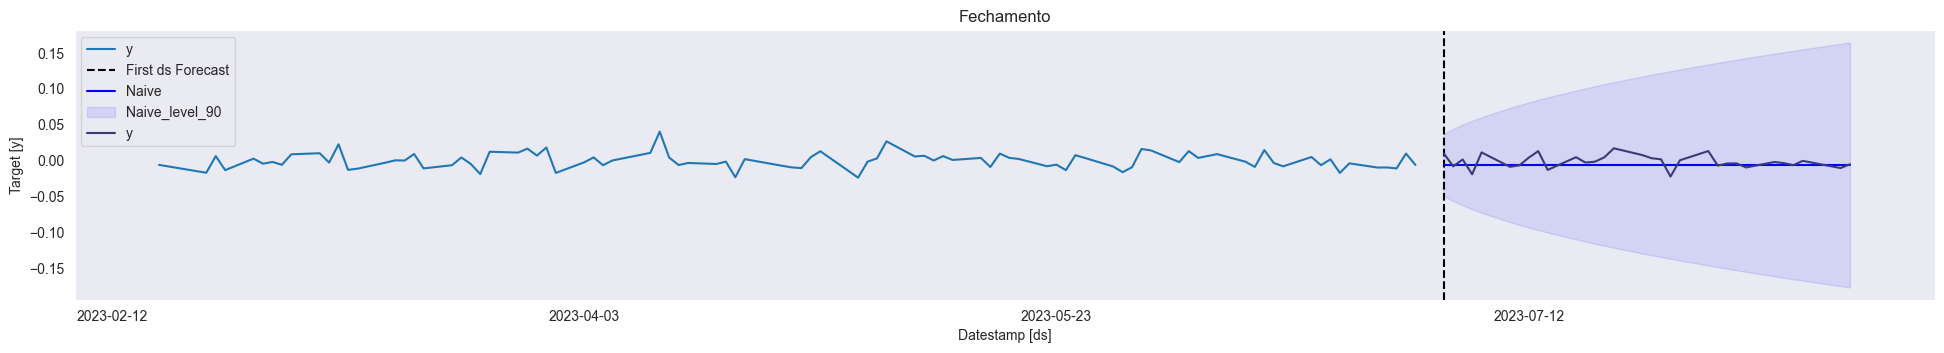

In [550]:
calc_forecast([Naive()],h2_test,train2,test2)

#### SeasonalNaive

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 123.05%


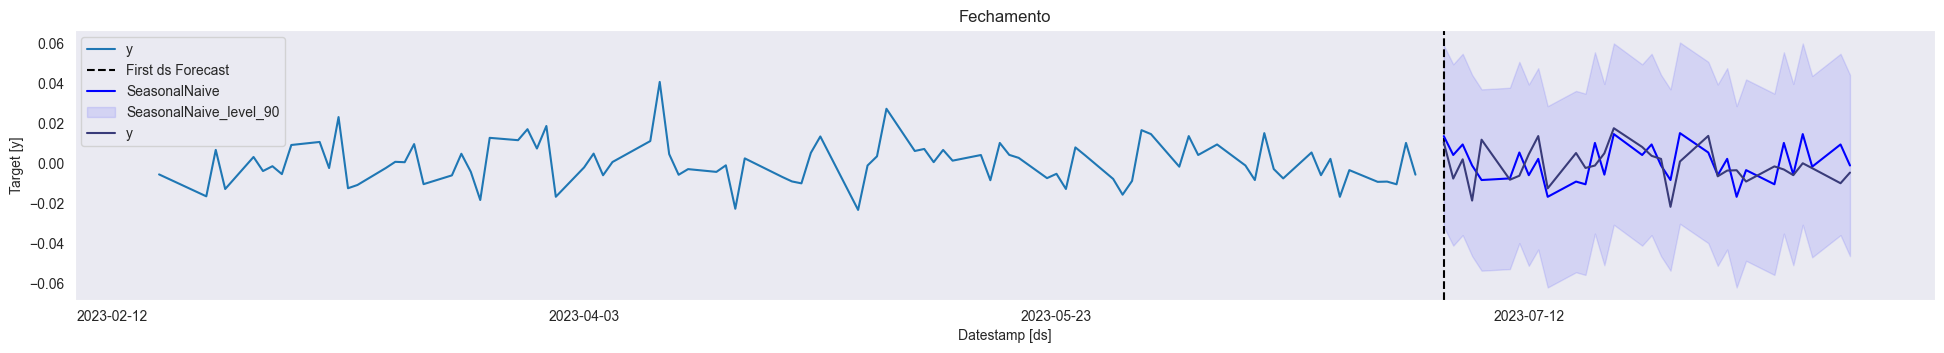

In [551]:
calc_forecast([SeasonalNaive(season_length=20)],h2_test,train2,test2)

#### SeasonalWindowAverage

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 106.67%


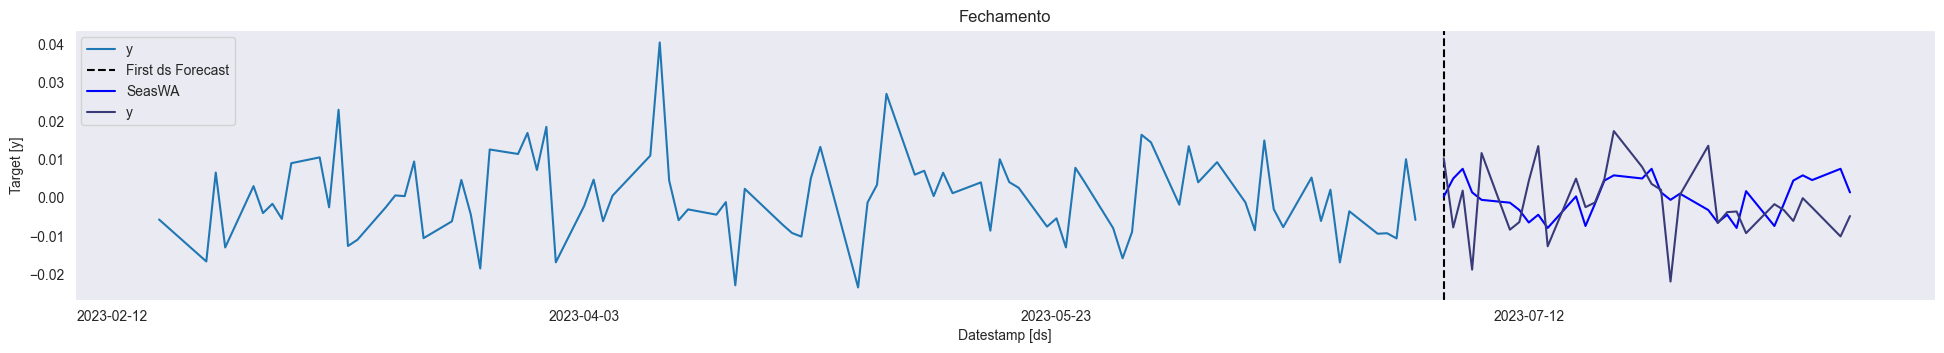

In [552]:
calc_forecast([SeasonalWindowAverage(season_length=20,window_size=5)],h2_test,train2,test2)

#### AutoARIMA

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 100.00%


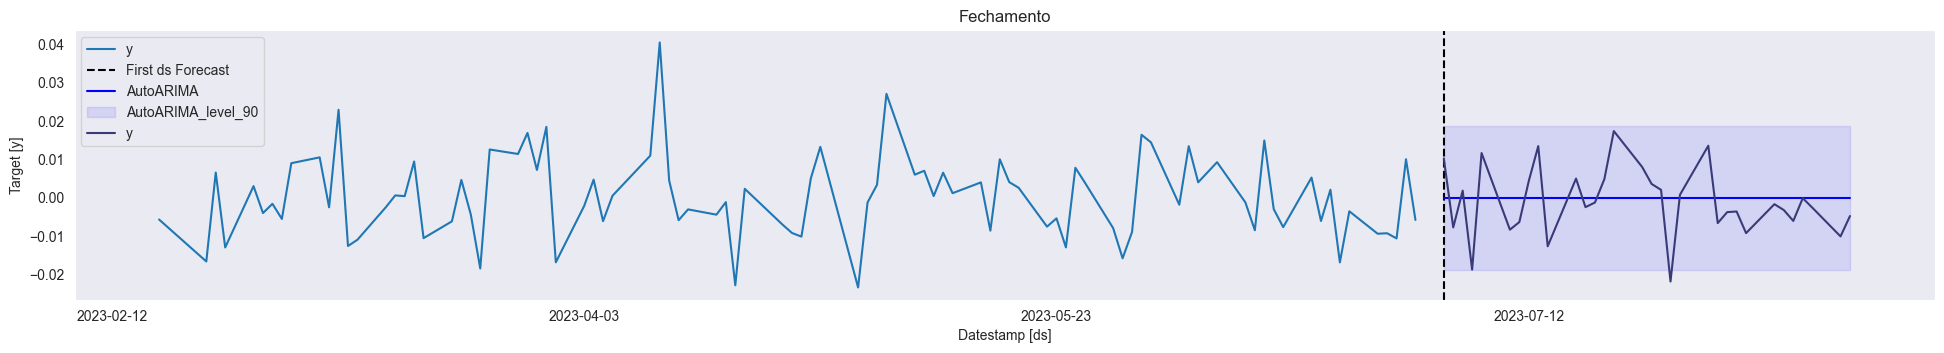

In [553]:
calc_forecast([AutoARIMA(season_length=20)],h2_test,train2,test2)

Tudo junto

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE Naive: 1.23%
WMAPE AutoARIMA: 1.23%
WMAPE SeasonalNaive: 1.96%
WMAPE SeasWA: 9.47%


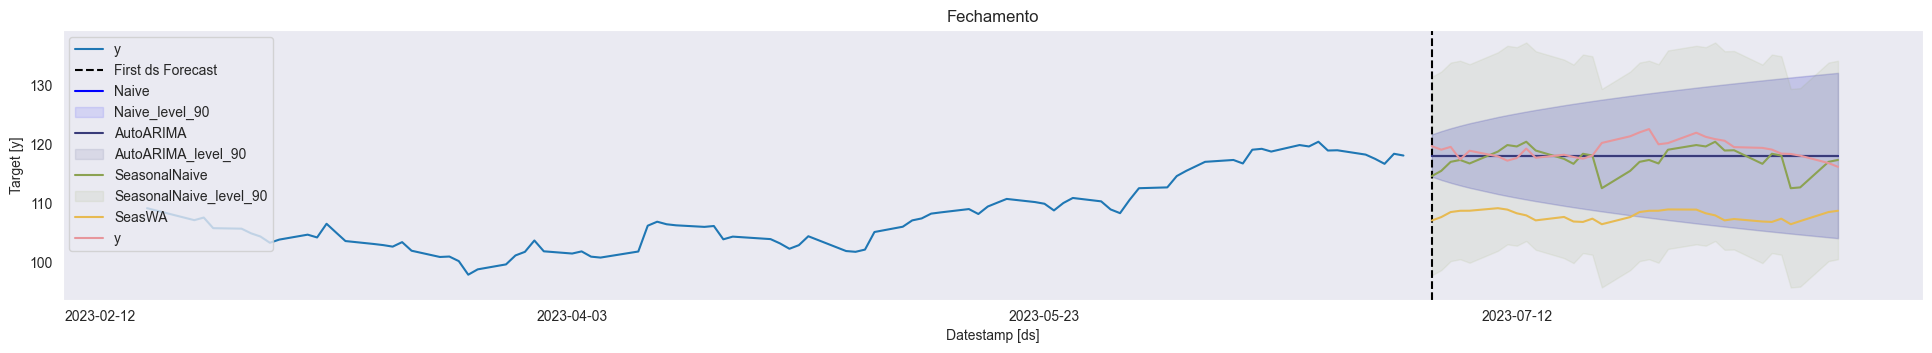

In [554]:
models1 = StatsForecast(models=[Naive(),AutoARIMA(season_length=20), SeasonalNaive(season_length=20),SeasonalWindowAverage(season_length=20,window_size=5)], freq='D', n_jobs=-1)
models1.fit(train)

forecasts1 = models1.predict(h=h_test, level=[90])
forecasts1 = forecasts1.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecasts1.dropna(inplace=True)

wmape_s1 = wmape(forecasts1['y'].values, forecasts1['Naive'].values)
print(f"WMAPE Naive: {wmape_s1:.2%}")
wmape_s1 = wmape(forecasts1['y'].values, forecasts1['AutoARIMA'].values)
print(f"WMAPE AutoARIMA: {wmape_s1:.2%}")
wmape_s1 = wmape(forecasts1['y'].values, forecasts1['SeasonalNaive'].values)
print(f"WMAPE SeasonalNaive: {wmape_s1:.2%}")
wmape_s1 = wmape(forecasts1['y'].values, forecasts1['SeasWA'].values)
print(f"WMAPE SeasWA: {wmape_s1:.2%}")

models1.plot(train, forecasts1, level=[90], unique_ids=['Fechamento'],engine ='matplotlib', max_insample_length=90)

In [555]:
forecasts1

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,SeasWA,y
2,Fechamento,2023-07-03,118.086998,114.521378,121.652618,118.086998,114.506691,121.667305,114.610001,97.816422,131.403580,107.089394,119.673
3,Fechamento,2023-07-04,118.086998,113.969780,122.204216,118.086998,113.952812,122.221184,115.487999,98.694420,132.281570,107.670403,119.076
4,Fechamento,2023-07-05,118.086998,113.483803,122.690193,118.086998,113.464844,122.709152,117.018997,100.225418,133.812576,108.523598,119.549
5,Fechamento,2023-07-06,118.086998,113.044449,123.129547,118.086998,113.023682,123.150314,117.335999,100.542419,134.129578,108.739998,117.426
6,Fechamento,2023-07-07,118.086998,112.640427,123.533569,118.086998,112.617989,123.556007,116.742996,99.949417,133.536575,108.748199,118.898
9,Fechamento,2023-07-10,118.086998,111.577095,124.596901,118.086998,111.550285,124.623711,118.758003,101.964424,135.551575,109.178604,117.942
10,Fechamento,2023-07-11,118.086998,111.259361,124.914635,118.086998,111.231232,124.942764,119.858002,103.064423,136.651581,108.938202,117.220
11,Fechamento,2023-07-12,118.086998,110.955757,125.218239,118.086998,110.926384,125.247612,119.622002,102.828423,136.415573,108.315002,117.666
12,Fechamento,2023-07-13,118.086998,110.664574,125.509422,118.086998,110.633995,125.540001,120.419998,103.626419,137.213577,107.962997,119.264
13,Fechamento,2023-07-14,118.086998,110.384384,125.789612,118.086998,110.352654,125.821342,118.933998,102.140419,135.727570,107.116196,117.711


<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE Naive: 109.97%
WMAPE AutoARIMA: 100.00%
WMAPE SeasonalNaive: 123.05%
WMAPE SeasWA: 106.67%


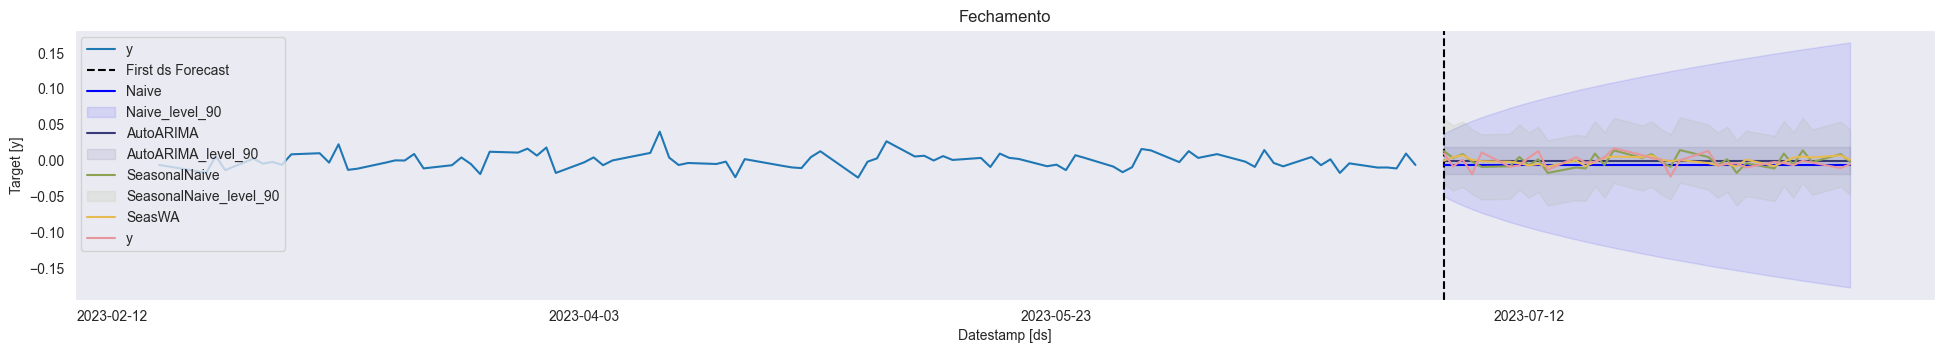

In [314]:
models2 = StatsForecast(models=[Naive(),AutoARIMA(season_length=20), SeasonalNaive(season_length=20),SeasonalWindowAverage(season_length=20,window_size=5)], freq='D', n_jobs=-1)
models2.fit(train2)

forecasts2 = models2.predict(h=h2_test, level=[90])
forecasts2 = forecasts2.reset_index().merge(test2, on=['ds', 'unique_id'], how='left')
forecasts2.dropna(inplace=True)

wmape_s2 = wmape(forecasts2['y'].values, forecasts2['Naive'].values)
print(f"WMAPE Naive: {wmape_s2:.2%}")
wmape_s2 = wmape(forecasts2['y'].values, forecasts2['AutoARIMA'].values)
print(f"WMAPE AutoARIMA: {wmape_s2:.2%}")
wmape_s2 = wmape(forecasts2['y'].values, forecasts2['SeasonalNaive'].values)
print(f"WMAPE SeasonalNaive: {wmape_s2:.2%}")
wmape_s2 = wmape(forecasts2['y'].values, forecasts2['SeasWA'].values)
print(f"WMAPE SeasWA: {wmape_s2:.2%}")

models2.plot(train2, forecasts2, level=[90], unique_ids=['Fechamento'], engine ='matplotlib',max_insample_length=90)

### Mudando período de teste

In [315]:
# train2 = df2.loc[(df2['ds'] < '2023-08-16')]
train2 = df2.loc[(df2['ds']>= '2018-07-01') & (df2['ds'] < '2023-08-16')]
# train2 = df2.loc[(df2['ds']>= '2020-07-01') & (df2['ds'] < '2023-08-16')]
# train2 = df2.loc[(df2['ds']>= '2023-01-01') & (df2['ds'] < '2023-08-16')]
test2 = df2.loc[df2['ds'] >= '2023-08-16']

h=test2.iloc[-1]['ds']-train2.iloc[-1]['ds']
h2_test = h.days

In [316]:
h2_test

10

In [317]:
test2.shape

(8, 3)

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 90.73%


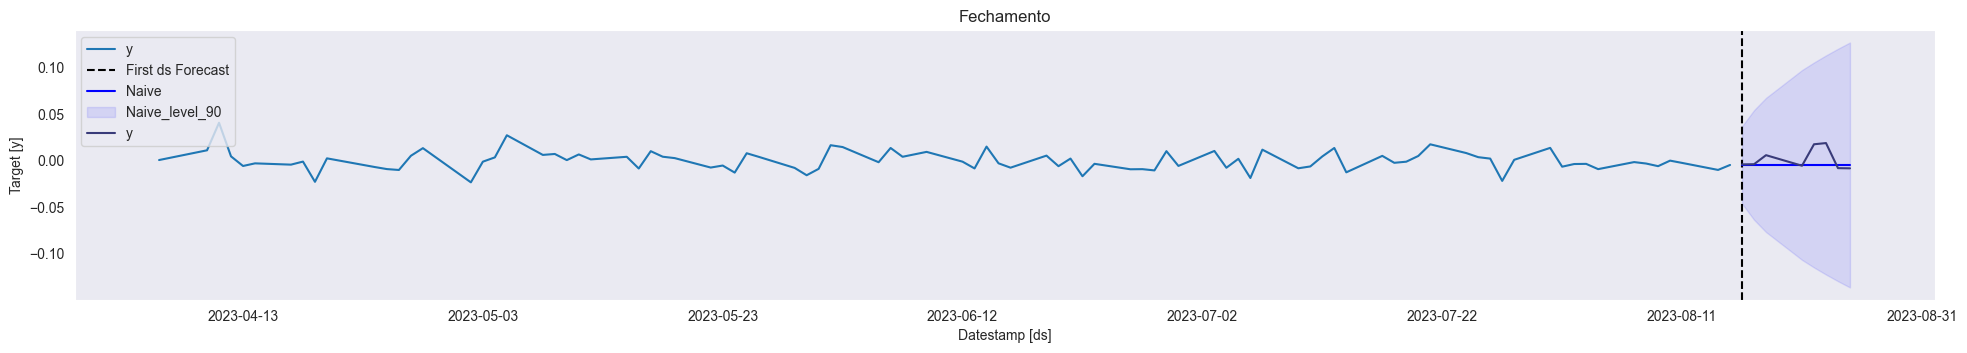

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 154.89%


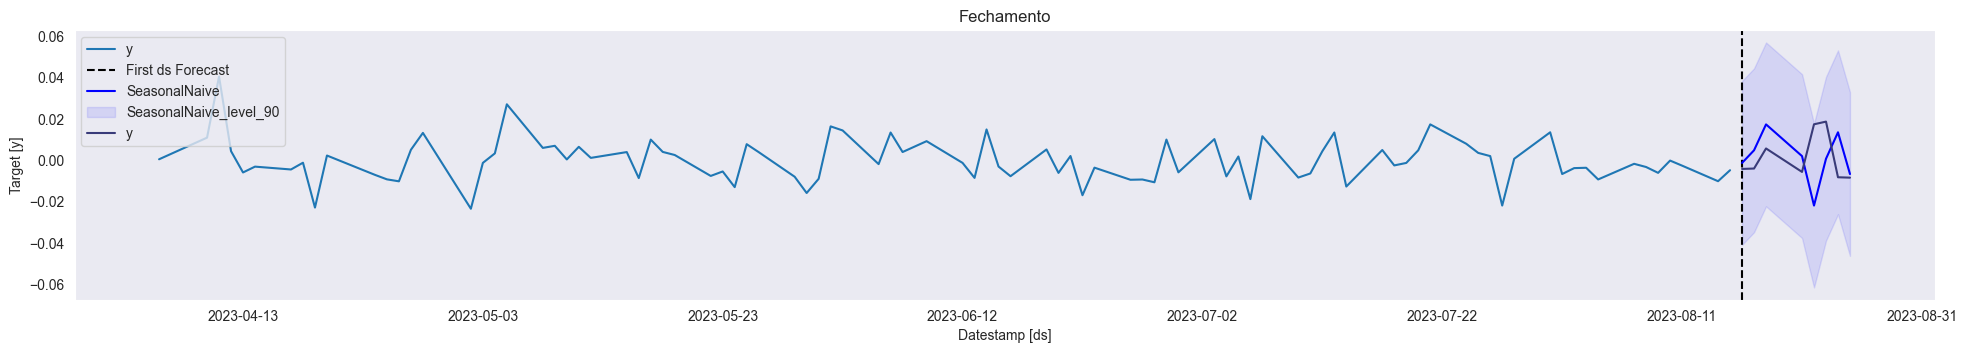

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 100.24%


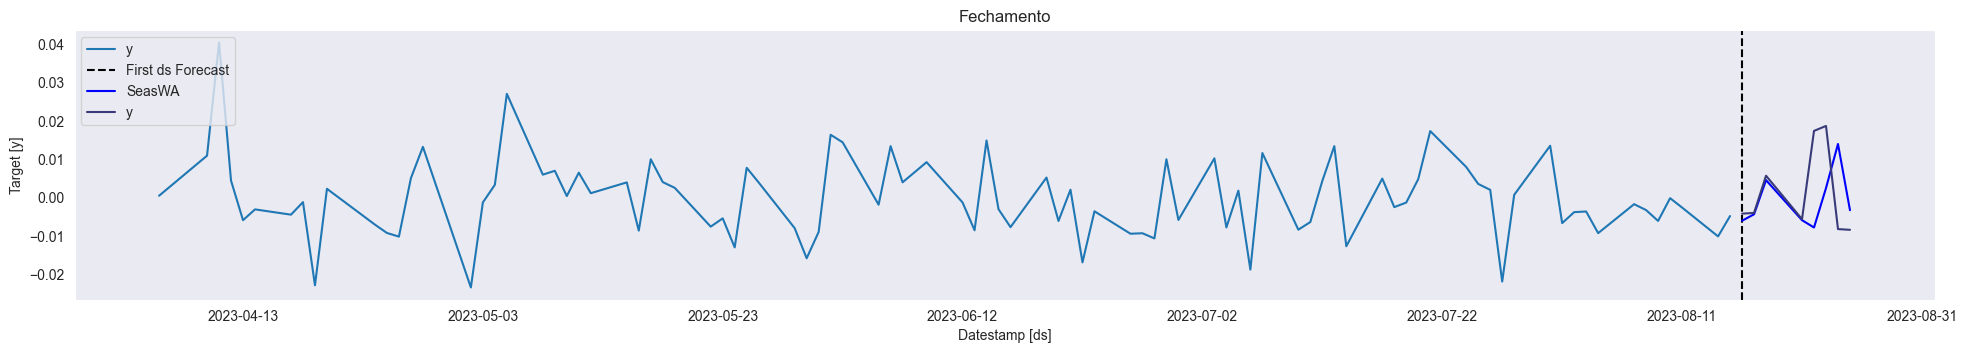

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 102.20%


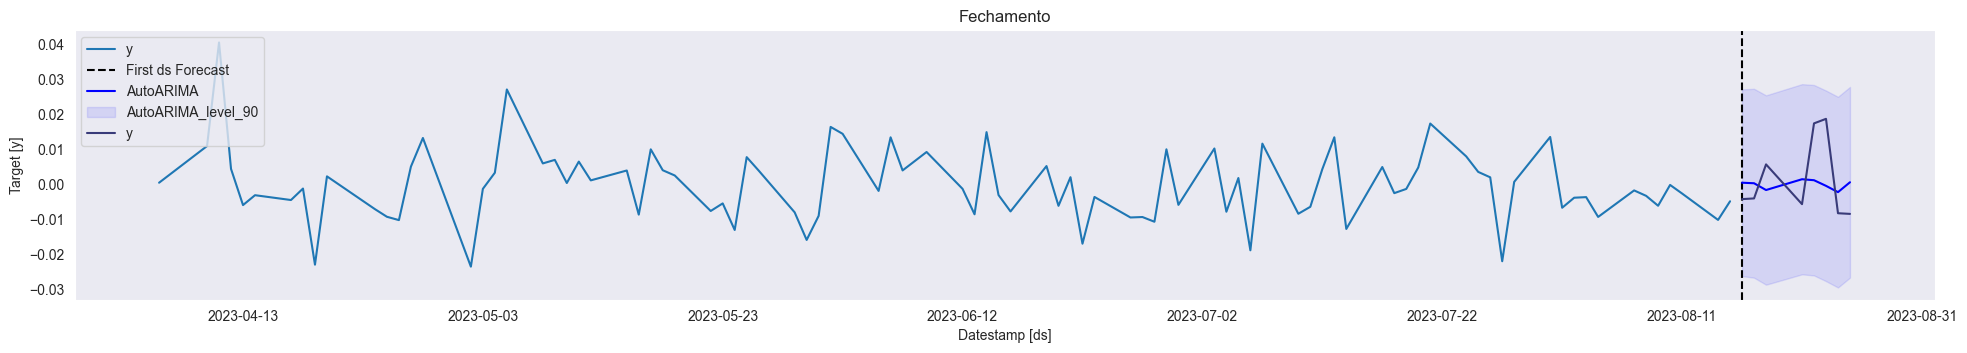

In [318]:
calc_forecast([Naive()],h2_test,train2,test2)
calc_forecast([SeasonalNaive(season_length=20)],h2_test,train2,test2)
calc_forecast([SeasonalWindowAverage(season_length=20,window_size=5)],h2_test,train2,test2)
calc_forecast([AutoARIMA(season_length=20)],h2_test,train2,test2)

In [319]:
# train = df1.loc[(df1['ds'] < '2023-07-01')]
# train = df1.loc[(df1['ds']>= '2018-07-01') & (df1['ds'] < '2023-08-16')]
train = df1.loc[(df1['ds']>= '2020-07-01') & (df1['ds'] < '2023-08-16')]
# train = df1.loc[(df1['ds']>= '2023-01-01') & (df1['ds'] < '2023-08-16')]
test = df1.loc[df1['ds'] >= '2023-08-16']
h=test.iloc[-1]['ds']-train.iloc[-1]['ds']
h_test = h.days

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 0.80%


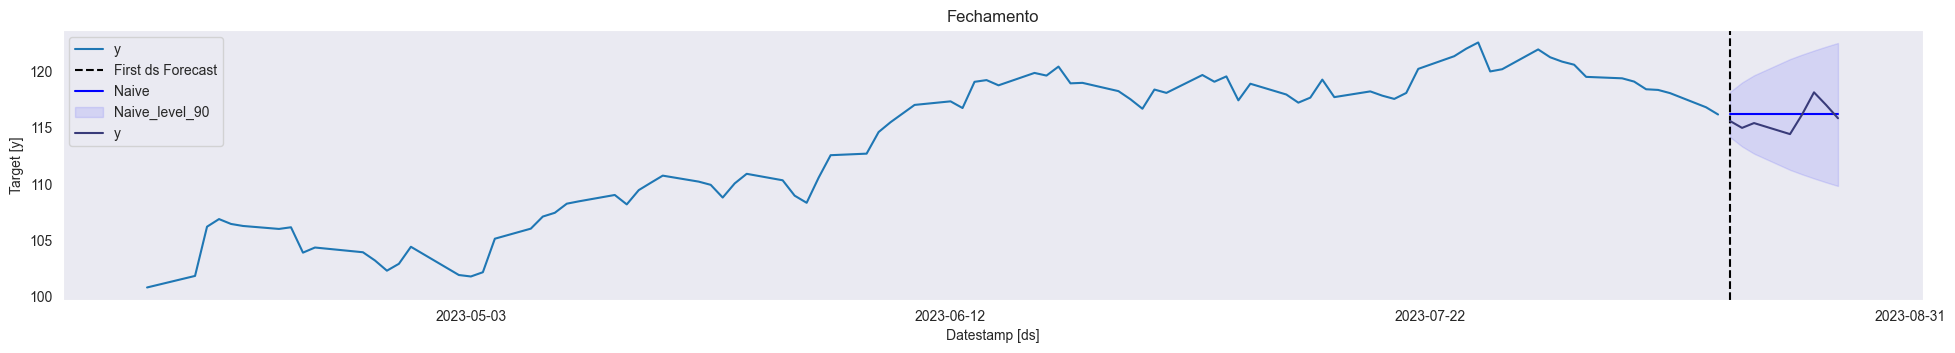

WMAPE: 3.69%


<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



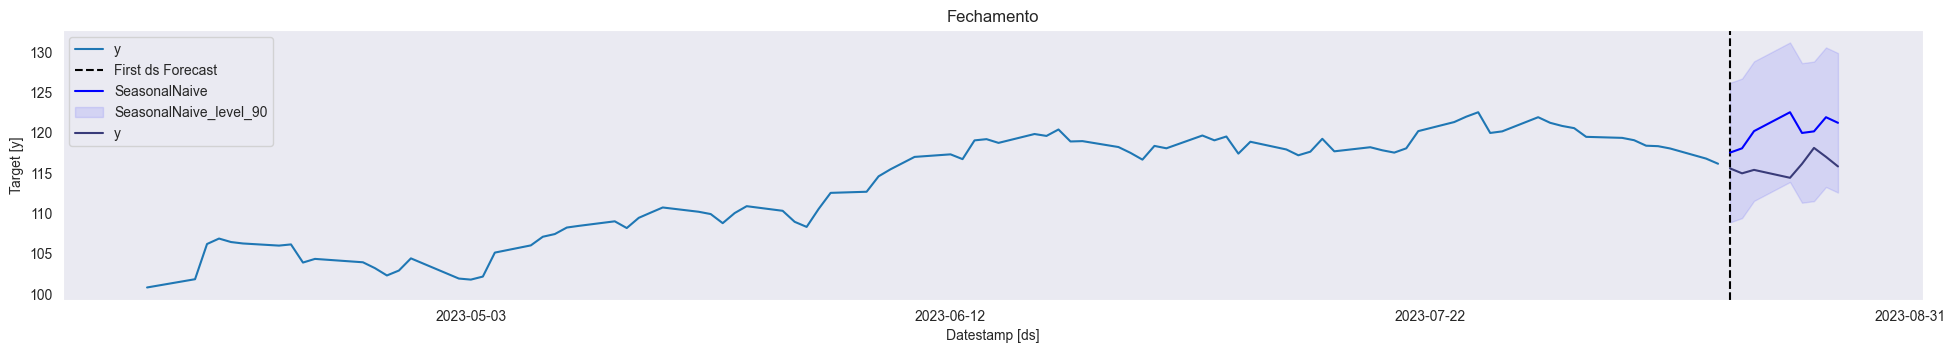

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 4.55%


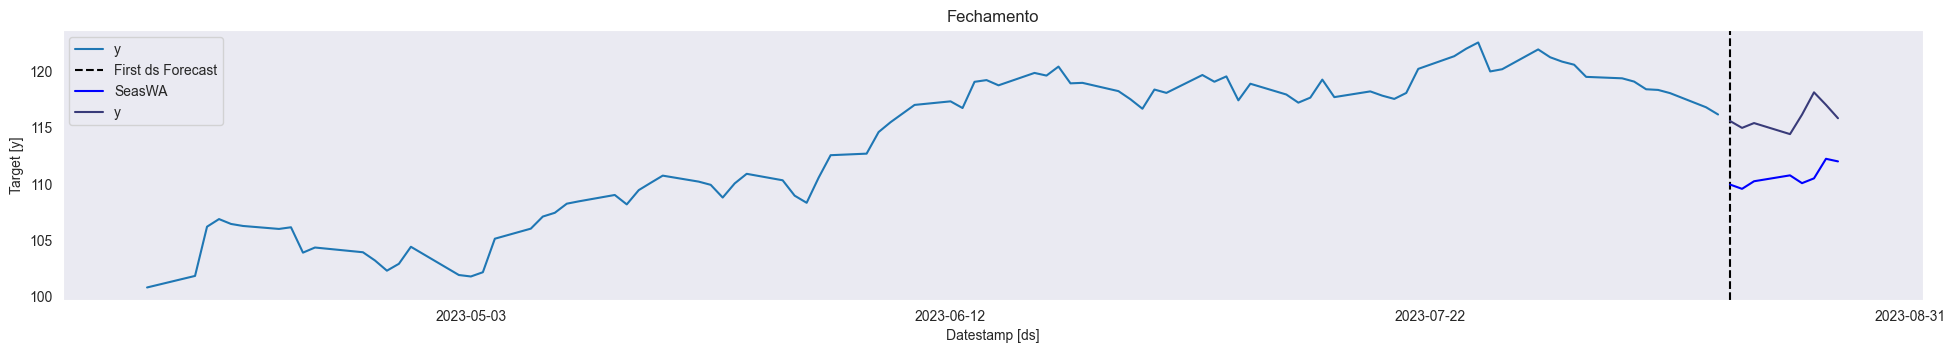

WMAPE: 0.80%


<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



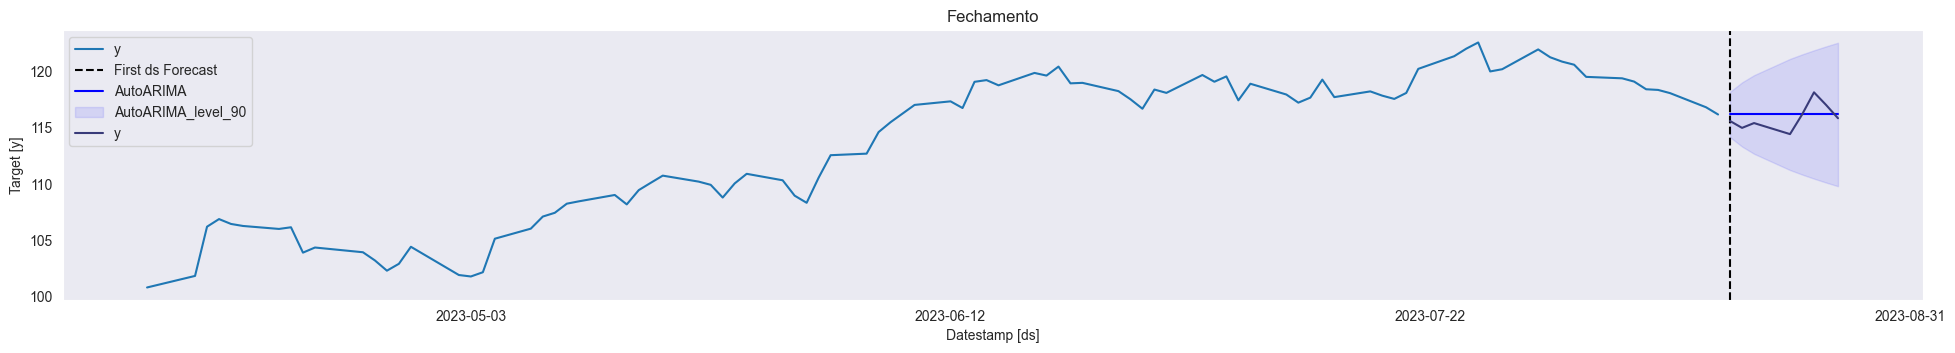

In [322]:
calc_forecast([Naive()],h_test,train,test)
calc_forecast([SeasonalNaive(season_length=20)],h_test,train,test)
calc_forecast([SeasonalWindowAverage(season_length=20,window_size=5)],h_test,train,test)
calc_forecast([AutoARIMA(season_length=20)],h_test,train,test)

Mudando mais um pouco

In [430]:
# df3 = pd.read_csv('Dados Históricos3 - Ibovespa.csv', parse_dates=[0], index_col='Data')   # 01/01/2023
df3 = pd.read_csv('Dados Históricos - Ibovespa 2018.csv', parse_dates=[0], index_col='Data') #01/07/2018

C:\Users\nycol\AppData\Local\Temp\ipykernel_8848\124670079.py:2: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [431]:
df3.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2023-08-30,117.535,118.404,118.841,117.471,"8,92M","-0,73%"
2023-08-29,118.404,118.051,118.493,117.400,"9,63M","1,10%"
2023-08-28,117.121,115.838,117.253,115.836,"9,60M","1,11%"
2023-08-25,115.837,117.025,117.252,115.397,"9,21M","-1,02%"
2023-08-24,117.026,118.135,118.136,116.848,"9,20M","-0,94%"


In [432]:
df3=df3[['Último']]

In [433]:
df3.columns=['Fechamento']

In [434]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1283 entries, 2023-08-30 to 2018-07-02
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  1283 non-null   float64
dtypes: float64(1)
memory usage: 20.0 KB


In [435]:
df3.sort_values(by='Data', inplace=True)

In [436]:
df3=df3.reset_index()
df3.columns=['ds','y']
df3.head()

,ds,y
0,2018-07-02,72.840
1,2018-07-03,73.668
2,2018-07-04,74.743
3,2018-07-05,74.553
4,2018-07-06,75.010


In [439]:
df3['unique_id']='Fechamento'
df3.head()

,ds,y,unique_id
0,2018-07-02,72.840,Fechamento
1,2018-07-03,73.668,Fechamento
2,2018-07-04,74.743,Fechamento
3,2018-07-05,74.553,Fechamento
4,2018-07-06,75.010,Fechamento


In [440]:
# train3 = df3.loc[(df3['ds'] < '2023-07-01')]
train3 = df3.loc[(df3['ds']>= '2018-07-01') & (df3['ds'] < '2023-08-16')]
# train3 = df3.loc[(df3['ds']>= '2020-07-01') & (df3['ds'] < '2023-08-16')]
# train3 = df3.loc[(df3['ds']>= '2023-01-01') & (df3['ds'] < '2023-08-16')]
test3 = df3.loc[df3['ds'] >= '2023-08-16']
h=test3.iloc[-1]['ds']-train3.iloc[-1]['ds']
h3_test = h.days

In [556]:
h3_test

15

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 0.94%


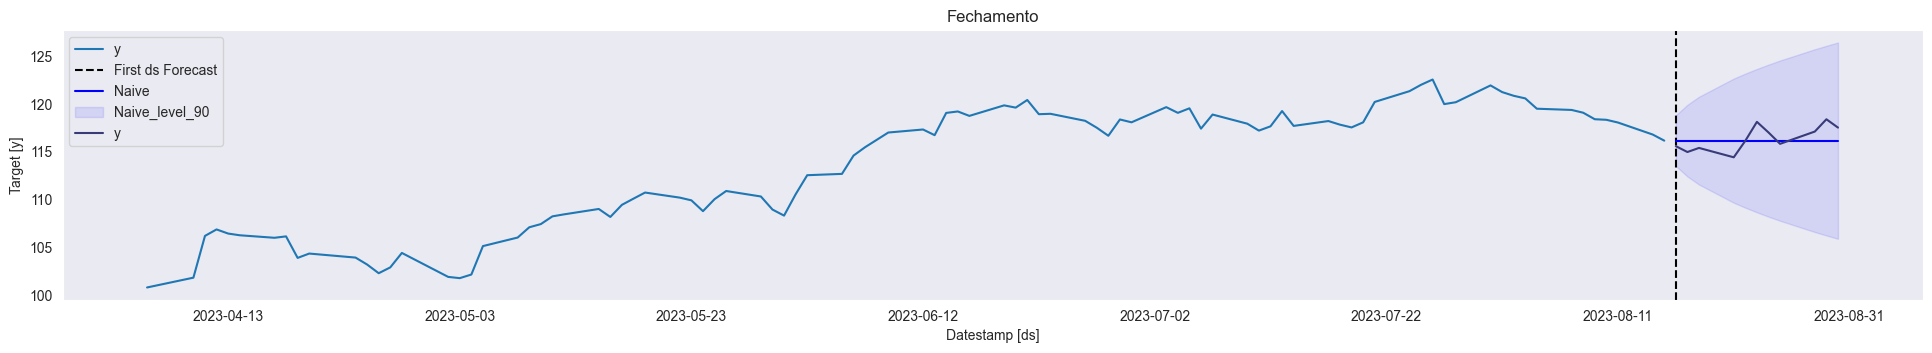

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 3.06%


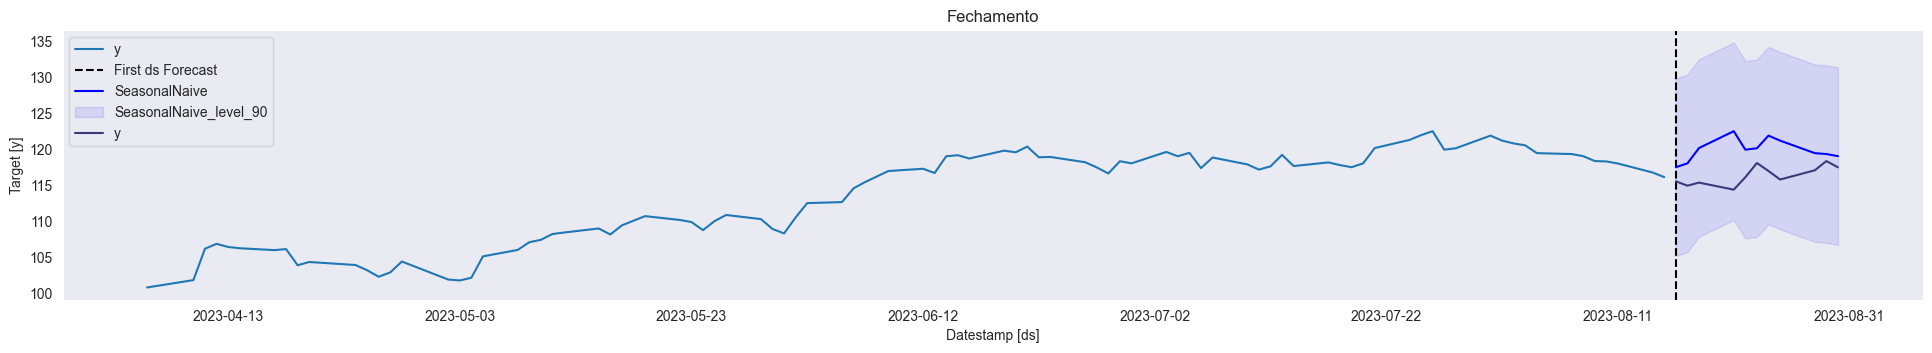

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 4.18%


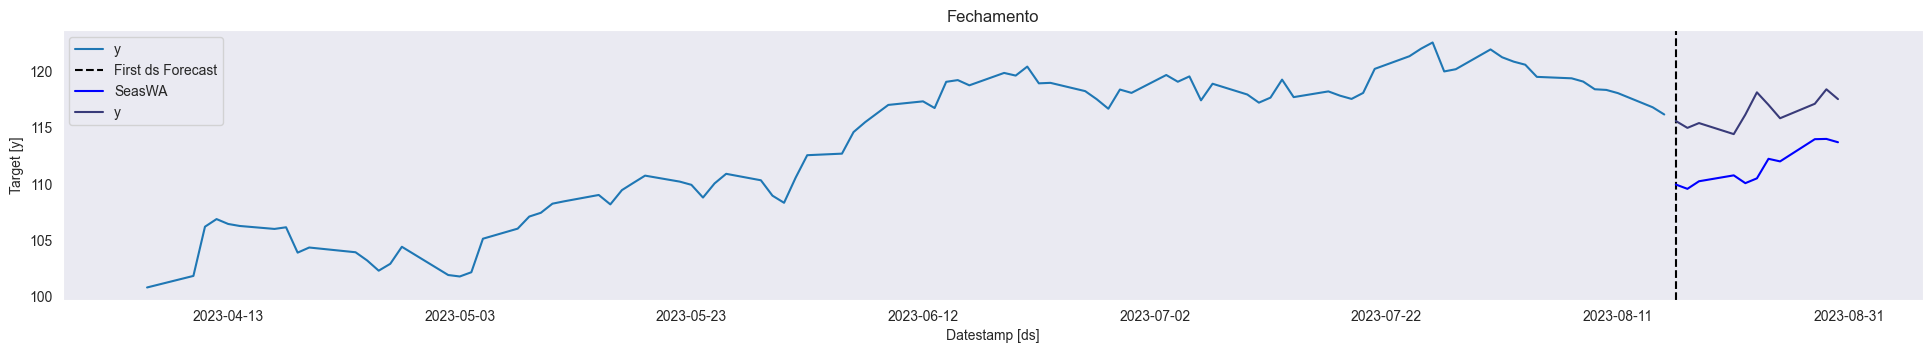

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



WMAPE: 0.94%


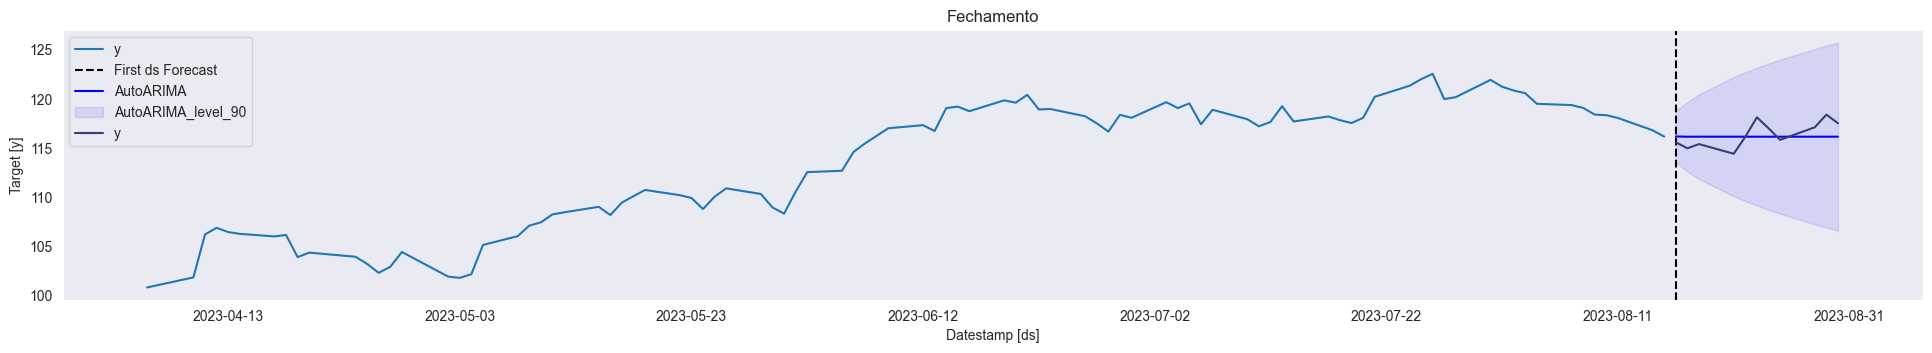

In [442]:
calc_forecast([Naive()],h3_test,train3,test3)
calc_forecast([SeasonalNaive(season_length=20)],h3_test,train3,test3)
calc_forecast([SeasonalWindowAverage(season_length=20,window_size=5)],h3_test,train3,test3)
calc_forecast([AutoARIMA(season_length=20)],h3_test,train3,test3)

### Prophet

In [444]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

Série sem transformação (df1)

In [445]:
df1

,ds,y,unique_id
0,2005-01-03,25.722,Fechamento
1,2005-01-04,24.848,Fechamento
2,2005-01-05,24.692,Fechamento
3,2005-01-06,24.367,Fechamento
4,2005-01-07,24.747,Fechamento
...,...,...,...
4613,2023-08-21,114.429,Fechamento
4614,2023-08-22,116.156,Fechamento
4615,2023-08-23,118.135,Fechamento
4616,2023-08-24,117.026,Fechamento


In [446]:
train

,ds,y,unique_id
4454,2023-01-02,106.376,Fechamento
4455,2023-01-03,104.166,Fechamento
4456,2023-01-04,105.334,Fechamento
4457,2023-01-05,107.641,Fechamento
4458,2023-01-06,108.964,Fechamento
...,...,...,...
4605,2023-08-09,118.409,Fechamento
4606,2023-08-10,118.350,Fechamento
4607,2023-08-11,118.065,Fechamento
4608,2023-08-14,116.810,Fechamento


Test3

In [447]:
m3=Prophet()
m3.add_seasonality(name='weekly', period=5, fourier_order=5)
m3.fit(train3)

19:13:48 - cmdstanpy - INFO - Chain [1] start processing


19:13:48 - cmdstanpy - INFO - Chain [1] done processing


In [448]:
future3=pd.concat([train3[['ds']],test3[['ds']]])
future3

,ds
0,2018-07-02
1,2018-07-03
2,2018-07-04
3,2018-07-05
4,2018-07-06
...,...
1278,2023-08-24
1279,2023-08-25
1280,2023-08-28
1281,2023-08-29


In [449]:
forecast3 = m3.predict(future3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1278,2023-08-24,113.500856,107.379386,119.647039
1279,2023-08-25,113.506377,107.263249,120.049813
1280,2023-08-28,113.133249,106.482224,119.383781
1281,2023-08-29,113.156275,107.167672,119.755790
1282,2023-08-30,113.184760,106.897659,119.458745


In [450]:
wmape_P3 = wmape(test3['y'].values, forecast3['yhat'].tail(test3.shape[0]).values)
print(f"WMAPE Prophet: {wmape_P3:.2%}")

WMAPE Prophet: 2.37%


In [451]:
plot_plotly(m3, forecast3)

In [452]:
m=Prophet()
m.add_seasonality(name='weekly', period=5, fourier_order=5)
m.fit(train)

19:13:49 - cmdstanpy - INFO - Chain [1] start processing
19:13:49 - cmdstanpy - INFO - Chain [1] done processing


In [453]:
test['ds']

4610   2023-08-16
4611   2023-08-17
4612   2023-08-18
4613   2023-08-21
4614   2023-08-22
4615   2023-08-23
4616   2023-08-24
4617   2023-08-25
Name: ds, dtype: datetime64[ns]

In [454]:
future=pd.concat([train[['ds']],test[['ds']]])
future

,ds
4454,2023-01-02
4455,2023-01-03
4456,2023-01-04
4457,2023-01-05
4458,2023-01-06
...,...
4613,2023-08-21
4614,2023-08-22
4615,2023-08-23
4616,2023-08-24


In [455]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# yhat são os valores previstos, inclusive faz ajustes nas datas históricas. E intervalos de incerteza

,ds,yhat,yhat_lower,yhat_upper
159,2023-08-21,119.745650,117.596653,121.958951
160,2023-08-22,119.793642,117.502624,121.869307
161,2023-08-23,119.921572,117.770595,122.178876
162,2023-08-24,119.767726,117.659095,122.024280
163,2023-08-25,120.068118,117.907037,122.176056


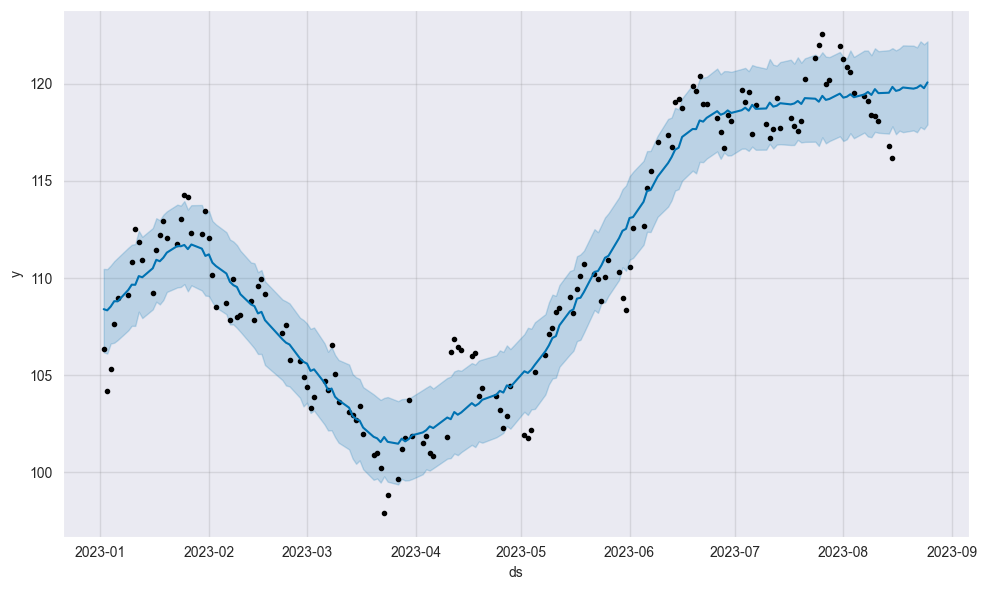

In [456]:
fig1=m.plot(forecast)
plot_plotly(m, forecast)

In [457]:
test.shape[0]

8

In [458]:
test['y'].values

array([115.592, 114.982, 115.409, 114.429, 116.156, 118.135, 117.026,
       115.837])

In [459]:
forecast['yhat'].tail(test.shape[0]).values

array([119.62998159, 119.67797334, 119.80590404, 119.74564983,
       119.79364158, 119.92157228, 119.76772604, 120.06811761])

In [460]:
test['ds'].values

array(['2023-08-16T00:00:00.000000000', '2023-08-17T00:00:00.000000000',
       '2023-08-18T00:00:00.000000000', '2023-08-21T00:00:00.000000000',
       '2023-08-22T00:00:00.000000000', '2023-08-23T00:00:00.000000000',
       '2023-08-24T00:00:00.000000000', '2023-08-25T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [461]:
forecast['ds'].tail(test.shape[0]).values

array(['2023-08-16T00:00:00.000000000', '2023-08-17T00:00:00.000000000',
       '2023-08-18T00:00:00.000000000', '2023-08-21T00:00:00.000000000',
       '2023-08-22T00:00:00.000000000', '2023-08-23T00:00:00.000000000',
       '2023-08-24T00:00:00.000000000', '2023-08-25T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [462]:
wmape_P1 = wmape(test['y'].values, forecast['yhat'].tail(test.shape[0]).values)
print(f"WMAPE Prophet: {wmape_P1:.2%}")

WMAPE Prophet: 3.33%


In [463]:
# fig2 = m.plot_components(forecast)
plot_components_plotly(m, forecast)